# GD ALGORITHMS


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time

m = 5
x = np.random.random(100)
c = np.random.random(100)
y = m * x + 0.5*c          

N = len(y)


## Batch

In [10]:
def batch(mp, cp, itr):
    k = 0
    # Prediction
    yp = mp*x + cp                


    for i in range(1, N):
        # Loss function
        k += (1/N)*(yp[i] - y[i])**2              
     # The weight or the hyper-parameter
    alpha = 0.01               
    for j in range(itr):
        m_1 = 0
        c_1 = 0
        for i in range(1, N):
            # Slope of loss function(w.r.t predicted slope)
            m_1 += (2/N)*x[i]*(mp*x[i]+cp - y[i])
            # Slope of loss function(w.r.t predicted intercept)
            c_1 += (2/N)*(mp*x[i]+cp - y[i])               
        mp = mp - alpha * m_1
        cp = cp - alpha * c_1

    return mp, cp, k


In [11]:
g = np.random.random()*10
b = np.random.random()*10

start_time = time.time()
z_batch = batch(g, b, 5000)[0]*x+batch(g, b, 5000)[1]

Required slope and intercept of loss function are: 4.988080900104825 & 0.25169899327893164
Minimum value of the cost function is 0.25514384405740737


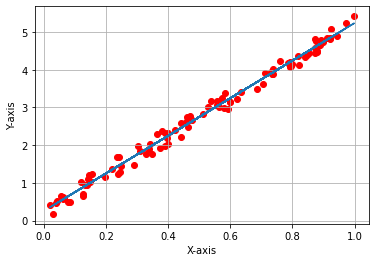

Runtime:2.11452054977417


In [12]:
print('Required slope and intercept of loss function are:', batch(g, b, 5000) [0], '&', batch(g, b, 5000)[1])
print('Minimum value of the cost function is', batch(g, b, 5000)[2])
plt.figure()
plt.scatter(x, y, c='red')
plt.plot(x, z_batch)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

end_time = time.time()
print('Runtime:'+(str)(end_time-start_time))

## sgd

In [13]:
def sgd(mp, cp, itr):
    # Prediction
    yp = mp*x + cp                
    
    for j in range(itr):
        # The weight or the hyper-parameter
        alpha = 0.01                
        k = 0
        m_1 = 0
        c_1 = 0
        
        for l in range(N):
            # Loss function
            k += (1/N)*(mp*x[l]+cp - y[l])**2  
            # Slope of loss function(w.r.t predicted slope)
            m_1 += (2/N)*x[l]*(mp*x[l]+cp - y[l])      
            # Slope of loss function(w.r.t predicted intercept)
            c_1 += (2/N)*(mp*x[l]+cp - y[l])               

        mp = mp - alpha * m_1
        cp = cp - alpha * c_1

    return mp, cp, k


In [14]:
g = np.random.random()*10
b = np.random.random()*10

start_time = time.time()
z_sgd = sgd(g, b, 5000)[0]*x + sgd(g, b, 5000)[1]

Required slope and intercept of loss function are: 4.986192414560863 & 0.25378658893833267
Minimum value of the cost function is 0.019730458242652276


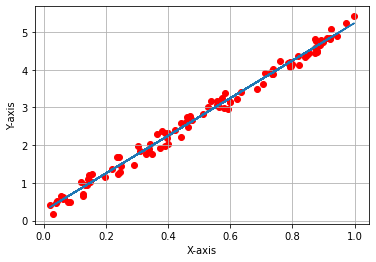

Runtime:3.787456750869751


In [15]:
print('Required slope and intercept of loss function are:', sgd(g, b, 5000) [0], '&', sgd(g, b, 5000)[1])
print('Minimum value of the cost function is', sgd(g, b, 5000)[2])
plt.figure()
plt.scatter(x, y,c='red')
plt.plot(x, z_sgd)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


end_time = time.time()
print('Runtime:'+(str)(end_time-start_time))


## Mini_Batch

Required slope and intercept of loss function are: 4.979336712079106 & 0.2480457027190837
Minimum value of the cost function is 0.015157119489738814


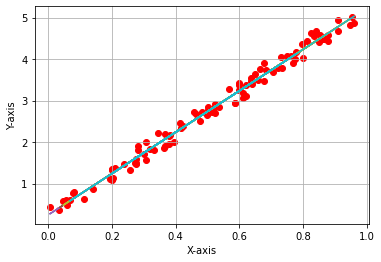

Runtime:6.3973469734191895


In [16]:
m = 5
x = np.random.random(100).reshape(10, 10)
c = np.random.random(100).reshape(10, 10)
y = m * x + 0.5*c              
N = 10



def mini_batch(mp, cp, itr):
    # Prediction
    yp = mp*x + cp                
    
    for j in range(itr):
        for l in range(N):
            # The weight or the hyper-parameter
            alpha = 0.01                
            k = 0
            m_1 = 0
            c_1 = 0
            
            for i in range(N):
                # Loss function
                k += (1/N)*(mp*x[l][i]+cp - y[l][i])**2                
                # Slope of loss function(w.r.t predicted slope)
                m_1 += (2/N)*x[l][i]*(mp*x[l][i]+cp - y[l][i])     
                # Slope of loss function(w.r.t predicted intercept)
                c_1 += (2/N)*(mp*x[l][i]+cp - y[l][i])                

            mp = mp - alpha * m_1
            cp = cp - alpha * c_1

    return mp, cp, k




g = np.random.random()*10
b = np.random.random()*10
start_time = time.time()
z = mini_batch(g, b, 5000)[0]*x+mini_batch(g, b, 5000)[1]

print('Required slope and intercept of loss function are:', mini_batch(g, b, 5000) [0], '&', mini_batch(g, b, 5000)[1])
print('Minimum value of the cost function is', mini_batch(g, b, 5000)[2])

plt.figure()
plt.scatter(x, y, c='red')
plt.plot(x, z)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


end_time = time.time()
print('Runtime:'+(str)(end_time-start_time))


###  Batch GD took the least time, then was SGD and the slowest was mini batch GD.But if we take a large dataset then SGD will perform better than Batch GD in terms of time.